#### HR Analytics Attrition Project

###### import Libraries

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,power_transform, LabelEncoder
from scipy import stats
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn import metrics, tree ,svm
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
from sklearn import metrics
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings('ignore')

###### Read dataset

In [385]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv(r'E:\Data Trained_ Training\DataTrained___Evaluation Projects\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv')

###### check dimension of dataset

In [386]:
df.shape

(1470, 35)

*Observation:*<br>
*There are 1470 Rows and 35 Columns in the Dataset.*

###### sample data

In [387]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


###### Check Information About Dataset

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

*Observation:*<br>
*There are 26 int Type and 9 Object Type Columns.<br>
All columns Non-null count is 1470, which is equall to total rows in Dataset. So there is no null value.*

###### Check for Unique Value in Each Column

In [389]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

*Observation: <br>
Most of the Column have < 20 unique values , so they have Categorical data.<br>
column Age,StockOptionLevel,YearsAtCompany,HourlyRate,DistanceFromHome have <80 unique values so they have data is nominal.<br>
Except column MonthlyIncome,MonthlyRate,EmployeeNumber,DailyRate have higher range values so data is continuous data.*


###### Check for Missing Values

In [390]:
df.isnull().sum().sum()

0

*Observation:<br>
There is no null value in the Dataset.*

###### Check for Duplicate Rows

In [391]:
sum(df.duplicated())

0

*Observation:<br>
There are no Duplicate Rows in the Dataset.*

###### Check for Zero value in Dataset

In [392]:
#(df==0).sum()
print(df[df==0].count())
print('Total zeros in Dataset:', df[df==0].count().sum())

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked          197
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel            631
TotalWorkingYears            11
TrainingTimesLastYear        54
WorkLifeBalance               0
YearsAtC

*Observation:<br>
MOst of the Column have no Zero value. <br>
Except Column NumCompaniesWorked, StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,<br>
YearsSinceLastPromotion,YearsWithCurrManager, YearsAtCompany have Zero values in rows.*

###### Percentage(%) of Date have Zero value

In [393]:
df[df==0].count()/df.shape[0]*100   

Age                          0.000000
Attrition                    0.000000
BusinessTravel               0.000000
DailyRate                    0.000000
Department                   0.000000
DistanceFromHome             0.000000
Education                    0.000000
EducationField               0.000000
EmployeeCount                0.000000
EmployeeNumber               0.000000
EnvironmentSatisfaction      0.000000
Gender                       0.000000
HourlyRate                   0.000000
JobInvolvement               0.000000
JobLevel                     0.000000
JobRole                      0.000000
JobSatisfaction              0.000000
MaritalStatus                0.000000
MonthlyIncome                0.000000
MonthlyRate                  0.000000
NumCompaniesWorked          13.401361
Over18                       0.000000
OverTime                     0.000000
PercentSalaryHike            0.000000
PerformanceRating            0.000000
RelationshipSatisfaction     0.000000
StandardHour

*Observation:<br>
Column StockOptionLevel and YearsSinceLastPromotion have more than 20% of zero value data.<br>
column YearsWithCurrManager,YearsInCurrentRole,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany and <br>
TotalWorkingYears have less the 20% of zero value data.*

###### Target and Feature Variables

*Observation :* <br> *Target Variable(Dependent)-Attrition <br> Feature Variable(Independent)-All Variables*

###### Check for Type of Variable

###### Check for Numerical Variables

In [394]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  26


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


###### check for Numeric feature unique value count

In [395]:
for feature in numerical_features:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is Age and number of numerical are 43
The feature is DailyRate and number of numerical are 886
The feature is DistanceFromHome and number of numerical are 29
The feature is Education and number of numerical are 5
The feature is EmployeeCount and number of numerical are 1
The feature is EmployeeNumber and number of numerical are 1470
The feature is EnvironmentSatisfaction and number of numerical are 4
The feature is HourlyRate and number of numerical are 71
The feature is JobInvolvement and number of numerical are 4
The feature is JobLevel and number of numerical are 5
The feature is JobSatisfaction and number of numerical are 4
The feature is MonthlyIncome and number of numerical are 1349
The feature is MonthlyRate and number of numerical are 1427
The feature is NumCompaniesWorked and number of numerical are 10
The feature is PercentSalaryHike and number of numerical are 15
The feature is PerformanceRating and number of numerical are 2
The feature is RelationshipSatisfactio

*Observation:*<br> *All 26 features have numeric values*

###### Check for Continous variable and Discrete variable    (Numeric Features)

In [396]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

#Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

# Discrete feature
df[discrete_feature].head()

Discrete Variables Count: 17


,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1,2,3,2,4,8,11,3,1,80,0,0,1,4,0,5
1,1,1,3,2,2,2,1,23,4,4,80,1,3,3,7,1,7
2,2,1,4,2,1,3,6,15,3,2,80,0,3,3,0,0,0
3,4,1,4,3,1,3,1,11,3,3,80,0,3,3,7,3,0
4,1,1,1,3,1,2,9,12,3,4,80,1,3,3,2,2,2


In [397]:
#continuous variables
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous Variables Count {}".format(len(continuous_feature)))

# continuous feature
df[continuous_feature].head()

Continuous Variables Count 9


,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,41,1102,1,1,94,5993,19479,8,6
1,49,279,8,2,61,5130,24907,10,10
2,37,1373,2,4,92,2090,2396,7,0
3,33,1392,3,5,56,2909,23159,8,8
4,27,591,2,7,40,3468,16632,6,2


*Observation:*<br> *There are 17 Discrete Variables and 9 Continuous Variables.*

###### Check for Categorical Variable 

In [398]:
#Categorical Variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features))
df[categorical_features].head()

Number of Categorical variables:  9


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


###### Check for Unique Value of Categorical Variables

In [399]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Attrition and number of categories are 2
The feature is BusinessTravel and number of categories are 3
The feature is Department and number of categories are 3
The feature is EducationField and number of categories are 6
The feature is Gender and number of categories are 2
The feature is JobRole and number of categories are 9
The feature is MaritalStatus and number of categories are 3
The feature is Over18 and number of categories are 1
The feature is OverTime and number of categories are 2


*Observations:* <br> *column Over18 have 1 unique value <br>
column Attrition, Gender and OverTime have 2 unique values <br> 
column BusinessTravel, Department and MaritalStatus have 3 unique values <br>
and column EducationField, JobRole have more than 2 unique values.*

###### Check for Binary, Nominal and Ordinal Variables

In [400]:
## categorical variables are usually of 3 type
## 1. Binary Variable, Nominal variable and Ordinal Variables

binary_feature=[feature for feature in categorical_features if len(df[feature].unique())==2]
print("Binary Variables Count: {}".format(len(binary_feature)))

# # list of numerical variables
nominal_feature=[feature for feature in categorical_features if feature not in binary_feature]
print("Nominal feature Count {}".format(len(nominal_feature)))

Binary Variables Count: 3
Nominal feature Count 6


*Observation:*<br> *column Attrition, Gender and OverTime is Binary variable <br> and others are nominal variable.*

###### Check Cardinality of All Varaibles

###### check for Categorical Variable

Text(0.5, 1.0, 'Cardinality')

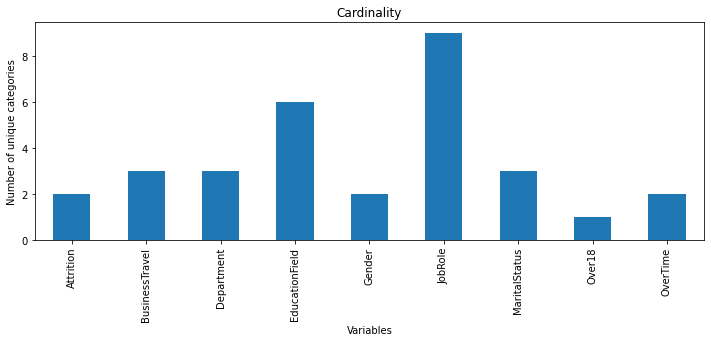

In [401]:
df[categorical_features].nunique().plot.bar(figsize=(12,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

*Observation:*<br> *All Categorical variable have low cardinality <br> Except JobRole have high cardinality*

###### Check for Numerical Variable

Text(0.5, 1.0, 'Cardinality')

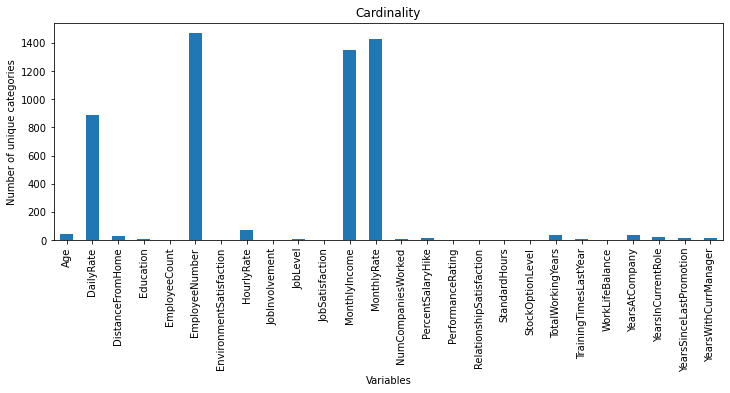

In [402]:
df[numerical_features].nunique().plot.bar(figsize=(12,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

*Observation:*<br> *All Numerical variable have low cardinality Except DailyRate, EmployeeNumber, MonthlyIncome and MonthlyRate*

###### Univariate Analysis

###### for Categorical Variable

###### 1. Attrition variable

<AxesSubplot:ylabel='Attrition'>

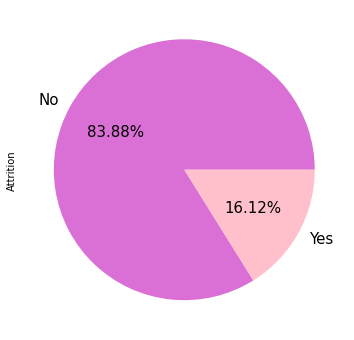

In [403]:
df['Attrition'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6),colors = ['orchid','pink'])


###### 2. BusinessTravel variable

<AxesSubplot:ylabel='BusinessTravel'>

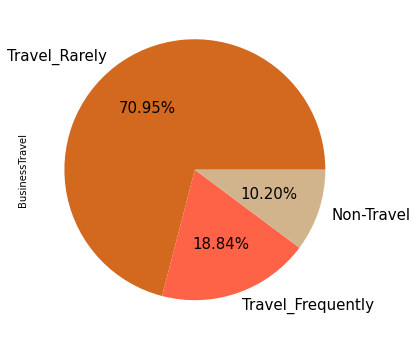

In [404]:
df['BusinessTravel'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6),colors = ['chocolate', 'tomato','tan'])


###### 3. Department variable

<AxesSubplot:ylabel='Department'>

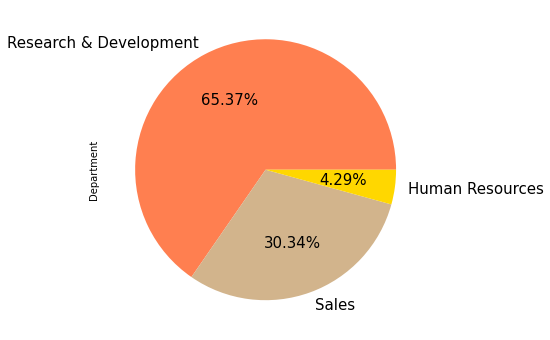

In [405]:
df['Department'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6),colors = ['coral', 'tan','gold'])


###### 4. EducationField variable

<AxesSubplot:ylabel='EducationField'>

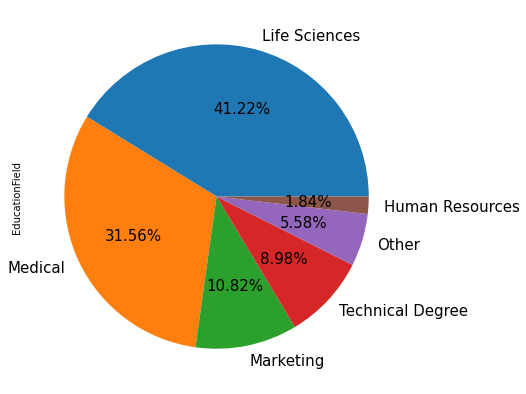

In [406]:
df['EducationField'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(7,7))


###### 5. Gender variable

<AxesSubplot:ylabel='Gender'>

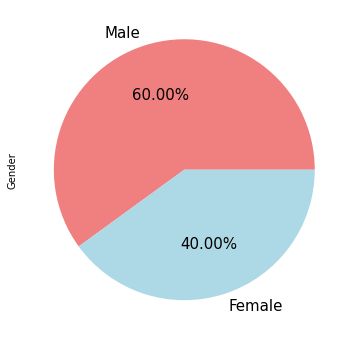

In [407]:
df['Gender'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6),colors = ['lightcoral', 'lightblue'])


###### 6.JobRole variable

<AxesSubplot:ylabel='JobRole'>

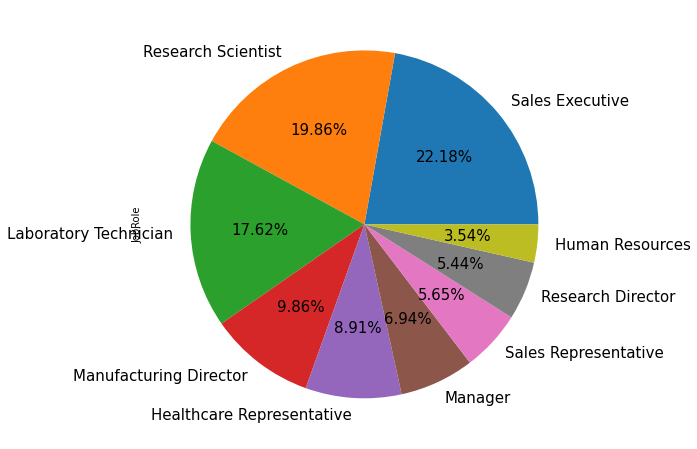

In [408]:
df['JobRole'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(8,8))


###### 7.MaritalStatus variable

<AxesSubplot:ylabel='MaritalStatus'>

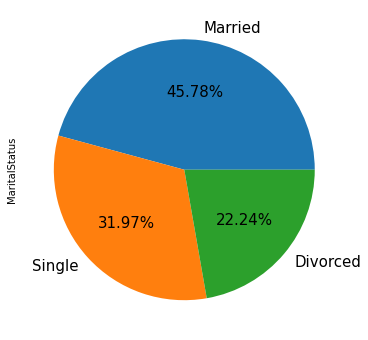

In [409]:
df['MaritalStatus'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6))


###### 8. Over18 variable

<AxesSubplot:ylabel='Over18'>

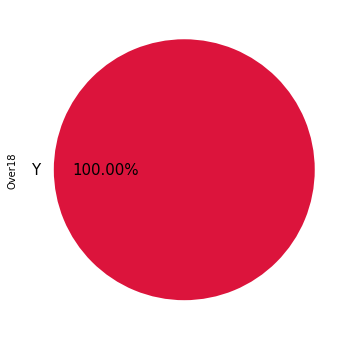

In [410]:
df['Over18'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6),colors = ['crimson'])


###### 9. OverTime variable

<AxesSubplot:ylabel='OverTime'>

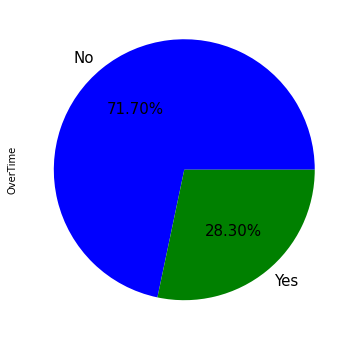

In [411]:
df['OverTime'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6),colors = ['blue','green'])


###### for Numeric Variable 

###### Discrete Variable

###### 1. Education Variable

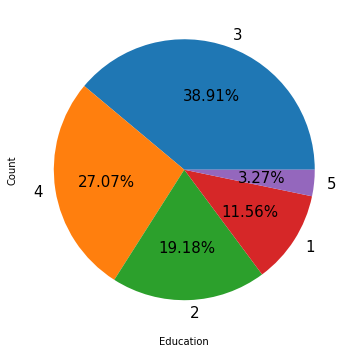

In [412]:
df['Education'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6))
plt.xlabel('Education')
plt.ylabel("Count")
plt.show()

*Observation :*<br>
*3% of Employee have 5th level of Education*<br>
*27% of Employee have 4th level of Education*<br>
*38% of Employee have 3rd level of Education*<br>
*19% of Employee have 2nd level of Education*<br>
*11% of Employee have 1st level of Education*

###### 2. EmployeeCount Variable

<AxesSubplot:ylabel='EmployeeCount'>

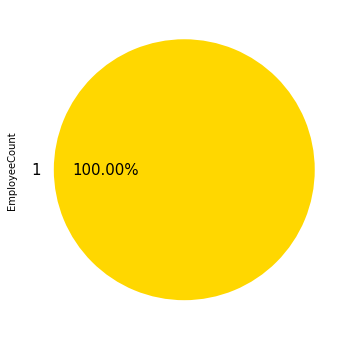

In [413]:
df['EmployeeCount'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6),colors=['gold'])

*Observation :*<br>*Employee Count is 100%*

###### 3. EnvironmentSatisfaction Variable

<AxesSubplot:ylabel='EnvironmentSatisfaction'>

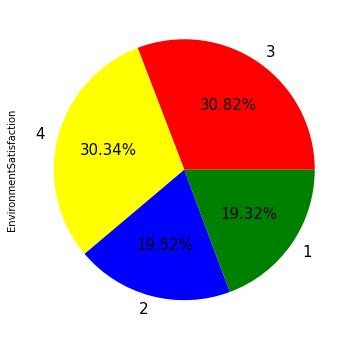

In [414]:
df['EnvironmentSatisfaction'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6),colors=['red','yellow','blue','green'])

*Observation :*<br>*1,2 Level and 3,4 Level of Employee have same % of Envirnment Stisfaction.*<br>
*3,4 Level Employee are more satisfied in compaire to 1,2 Level Employee*

###### 4. JobInvolvement Variable

<AxesSubplot:ylabel='JobInvolvement'>

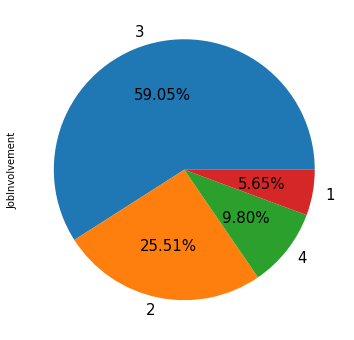

In [415]:
#df['JobInvolvement'].value_counts().plot(kind = "bar",fontsize=15,figsize=(29,6))
df['JobInvolvement'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6))

*Observation :*<br>*3rd level of Job Invoves max no of employees*

###### 5. JobLevel Variable

<AxesSubplot:ylabel='JobLevel'>

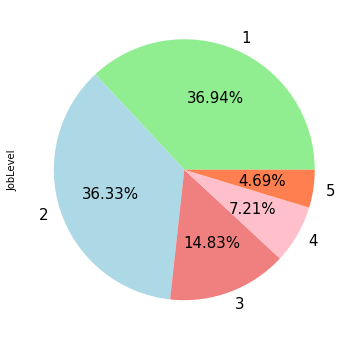

In [416]:
colors=['lightgreen','lightblue','lightcoral','pink','coral']
df['JobLevel'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6),colors=colors)

*Observation :*<br>*There max no of Employee at 1 and 2 level*<br>*As the level increases thre % decreases* <br>
*at the 5th level there are least no of employees*
    

###### 6. JobSatisfaction Variable

<AxesSubplot:>

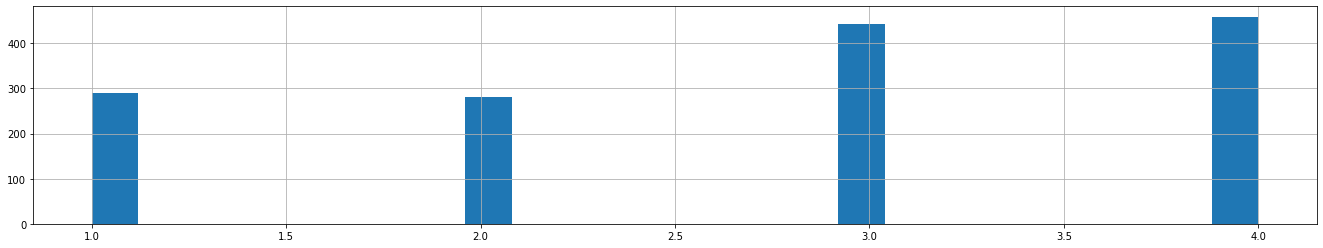

In [417]:
plt.figure(figsize=(23,4))
df['JobSatisfaction'].hist(bins=25)
#df['JobSatisfaction'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6))


*Observation :*<br>*4 Level and 3 Level Employee have max job Satisfation*

###### 7. NumCompaniesWorked Variable

<AxesSubplot:xlabel='NumCompaniesWorked'>

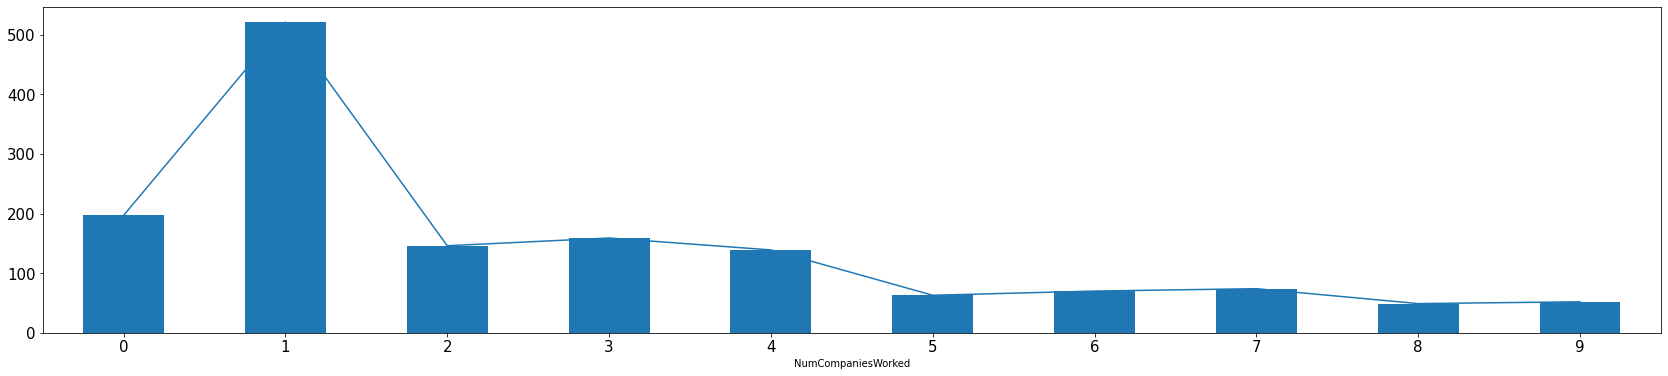

In [418]:
df.groupby(['NumCompaniesWorked']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))
df.groupby(['NumCompaniesWorked']).size().plot(kind = "line",fontsize=15,figsize=(29,6))
#df['NumCompaniesWorked'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6))


*Observation :*<br>*Most of the Employee Worked in only one company*
<br> *some of the Employee worked in 2 to 9 companies. Some have not worked in any company*

###### 8. PercentSalaryHike Variable

<AxesSubplot:xlabel='PercentSalaryHike'>

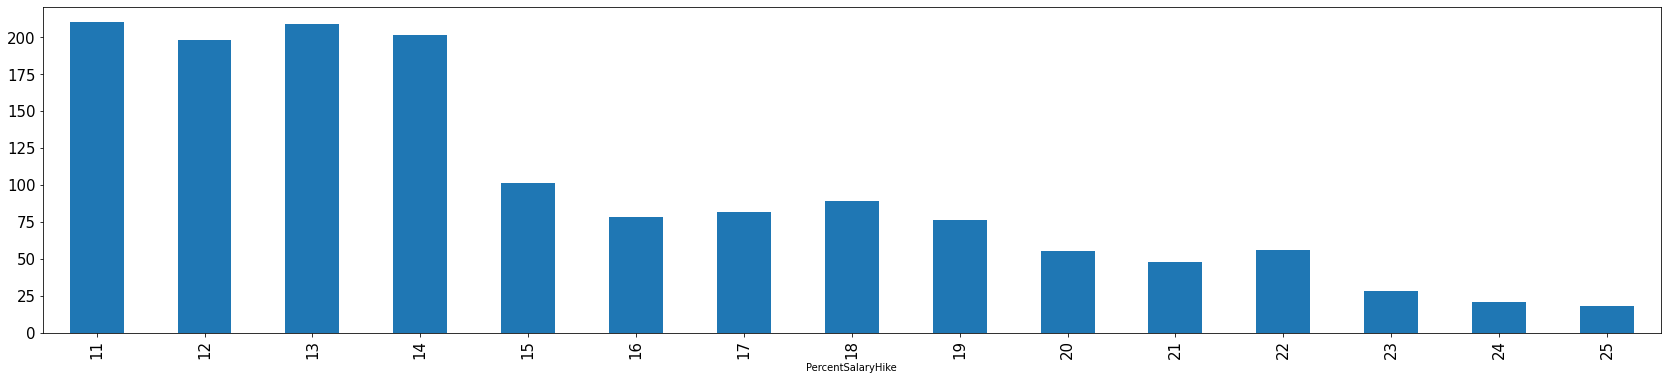

In [419]:
df.groupby(['PercentSalaryHike']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))

*Observation :*<br>*max Employee get salary hike range 11 to 14 %*<br>*Employee salary hike range 15 to 19 %*<br>
*Employee salary hike range 20 to 22 %*<br>*Least Employee get salary hike range 23 to 25 %*

###### 9. PerformanceRating Variable

In [420]:
df['PerformanceRating'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6)


SyntaxError: unexpected EOF while parsing (<ipython-input-420-94120bda7e49>, line 1)

*Observation :*<br>*86% Employee get performance rating 3*<>*15% Employee get performance rating 4*

###### 10. RelationshipSatisfaction Variable

<AxesSubplot:ylabel='RelationshipSatisfaction'>

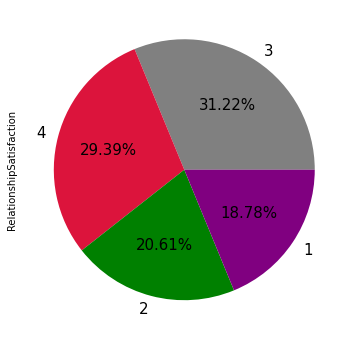

In [421]:
#df.groupby(['RelationshipSatisfaction']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))
df['RelationshipSatisfaction'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6),colors=['grey','crimson','green','purple'])

###### 11. StandardHours Variable

<AxesSubplot:xlabel='StandardHours'>

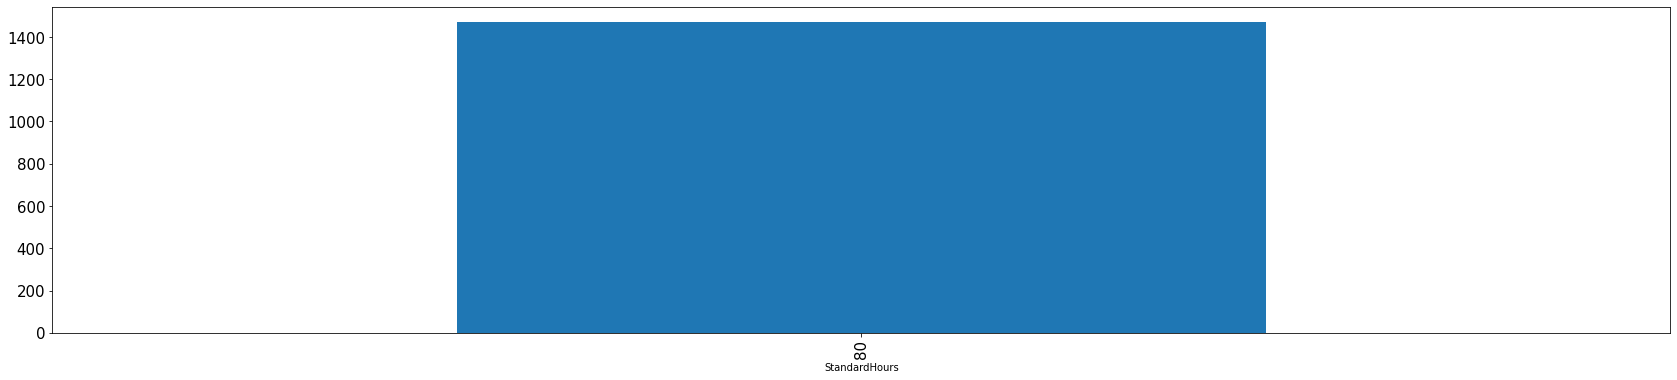

In [422]:
df.groupby(['StandardHours']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))
#df['StandardHours'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6))
#df['StandardHours'].nunique()

*Observation :*<br>*Only one Standard Hour Time*

###### 12. StockOptionLevel Variable

<AxesSubplot:xlabel='StockOptionLevel'>

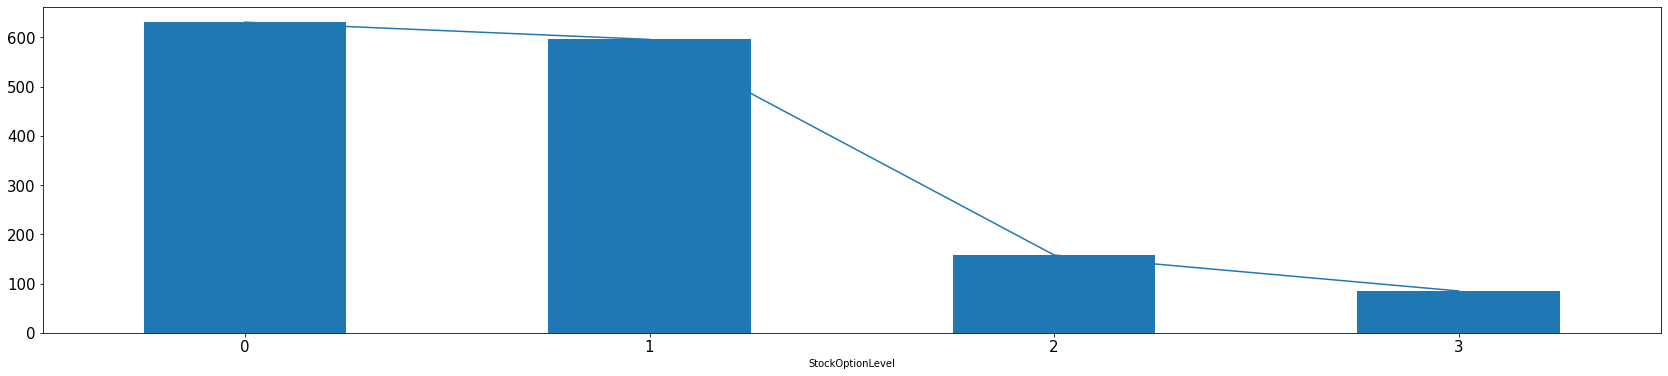

In [423]:
df.groupby(['StockOptionLevel']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))
df.groupby(['StockOptionLevel']).size().plot(kind = "line",fontsize=15,figsize=(29,6))
#df['StockOptionLevel'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6))


###### 13. TrainingTimesLastYear  Variable

<AxesSubplot:xlabel='TrainingTimesLastYear'>

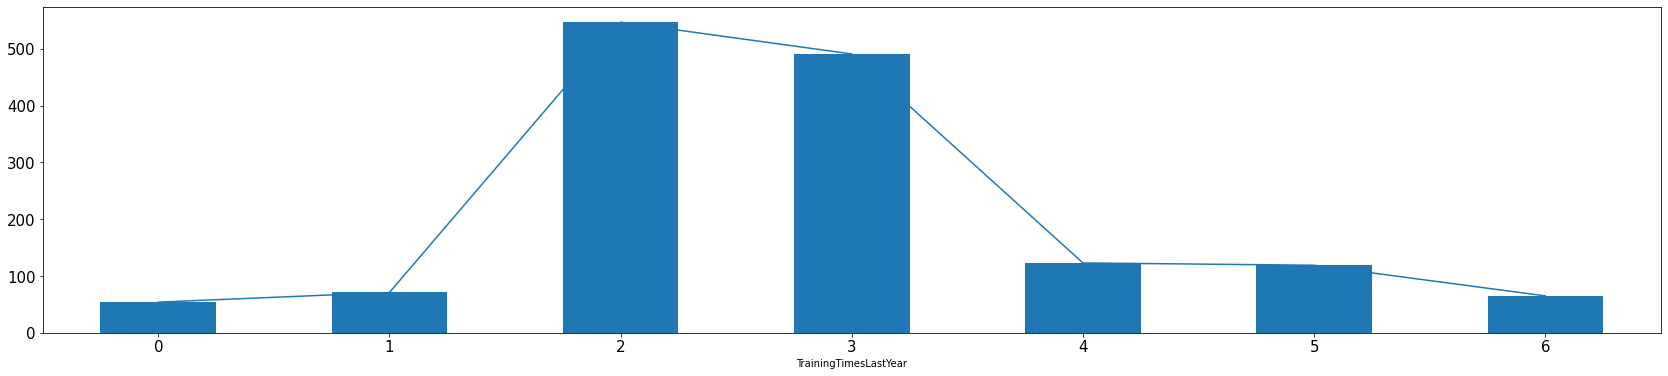

In [424]:
df.groupby(['TrainingTimesLastYear']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))
df.groupby(['TrainingTimesLastYear']).size().plot(kind = "line",fontsize=15,figsize=(29,6))
#df['TrainingTimesLastYear'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6))


###### 14. WorkLifeBalance Variable

<AxesSubplot:ylabel='WorkLifeBalance'>

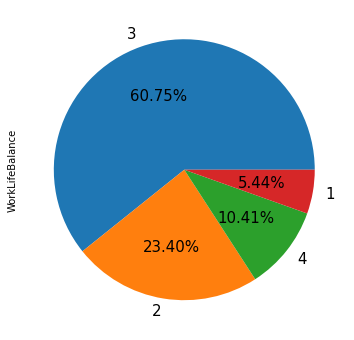

In [425]:
#df.groupby(['WorkLifeBalance']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))
df['WorkLifeBalance'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(6,6))


###### 15. YearsInCurrentRole Variable

<AxesSubplot:xlabel='YearsInCurrentRole'>

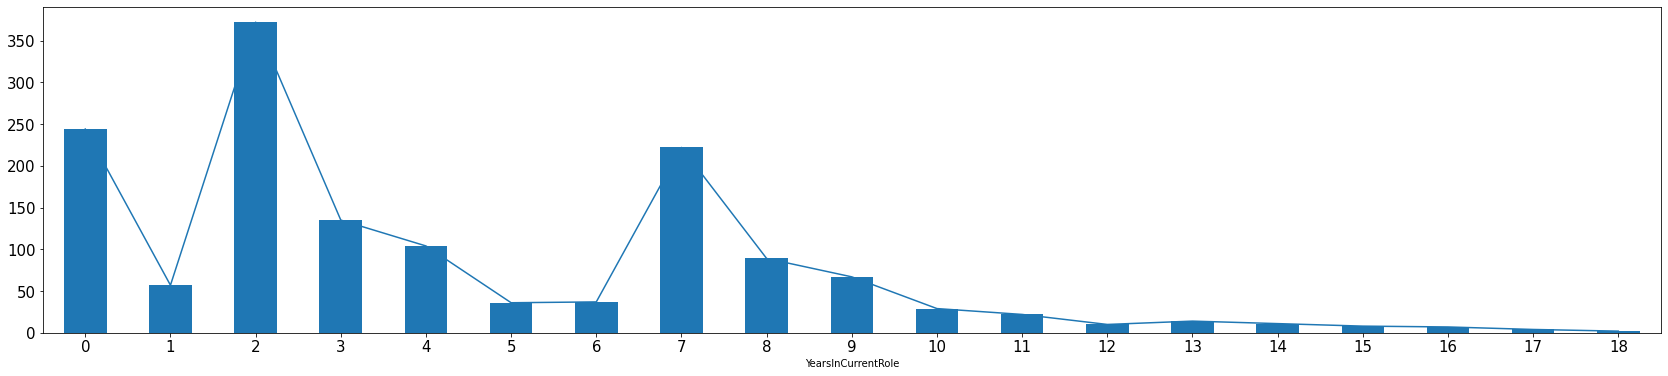

In [426]:
df.groupby(['YearsInCurrentRole']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))
df.groupby(['YearsInCurrentRole']).size().plot(kind = "line",fontsize=15,figsize=(29,6))

###### 16. YearsSinceLastPromotion Variable

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

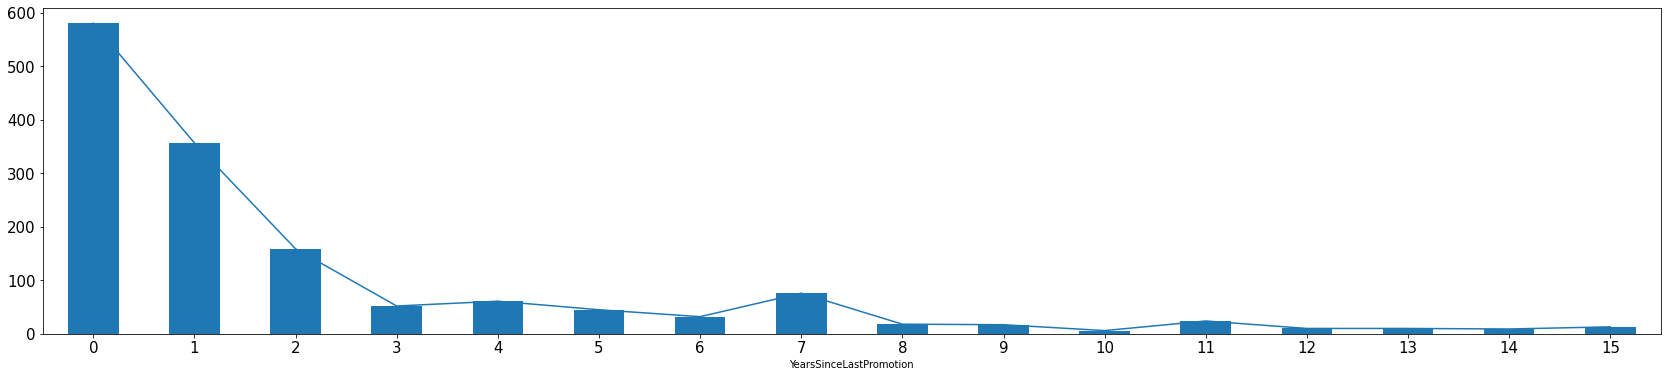

In [427]:
df.groupby(['YearsSinceLastPromotion']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))
df.groupby(['YearsSinceLastPromotion']).size().plot(kind = "line",fontsize=15,figsize=(29,6))

###### 17. YearsWithCurrManager Variable

<AxesSubplot:xlabel='YearsWithCurrManager'>

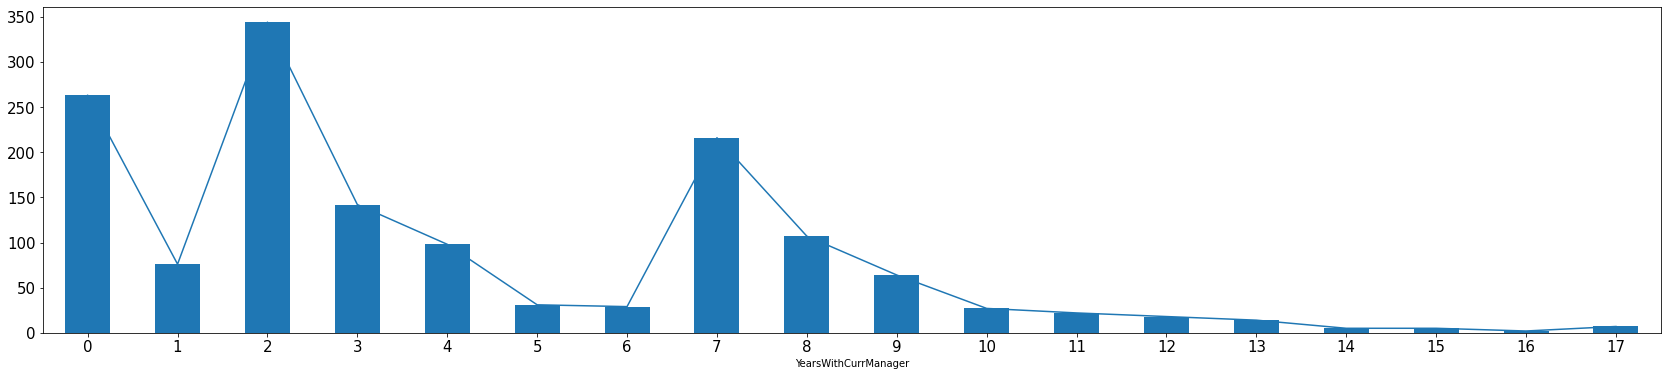

In [428]:
df.groupby(['YearsWithCurrManager']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))
df.groupby(['YearsWithCurrManager']).size().plot(kind = "line",fontsize=15,figsize=(29,6))

###### Continuous Variable

###### 1. Age Variable

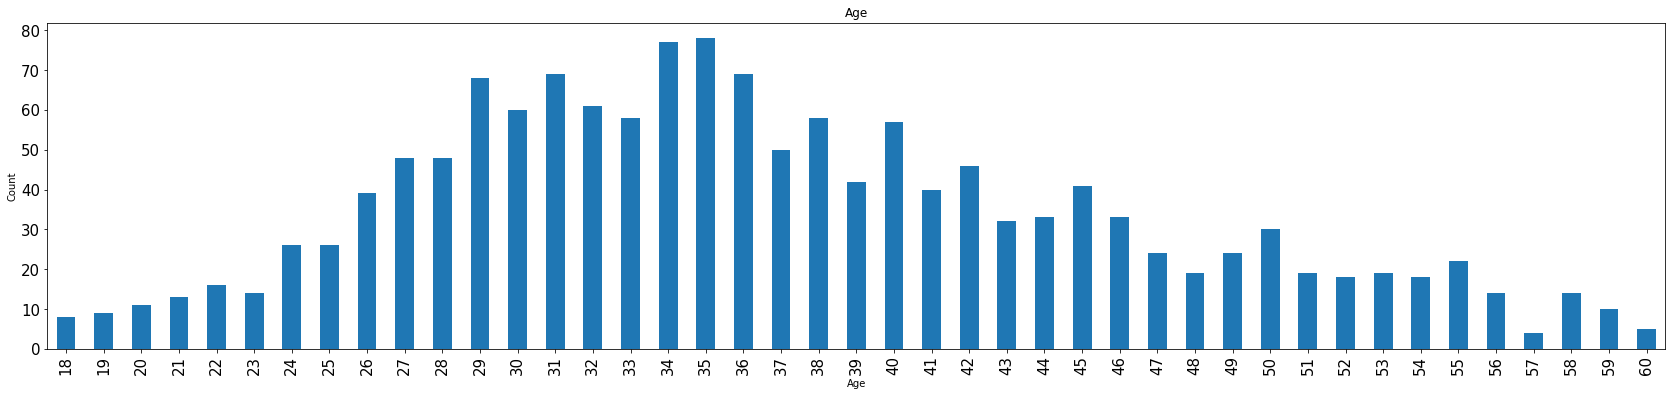

In [429]:
plt.figure(figsize=(23,4))
#df['Age'].hist(bins=25)
df.groupby(['Age']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))
plt.xlabel('Age')
plt.ylabel("Count")
plt.title('Age')
plt.show()


*Observation :* <br> *Employee age is in the range of 18 to 60*<br>
*highest no of employee is between the range of 29 to 39.*

###### 2 DailyRate Variable

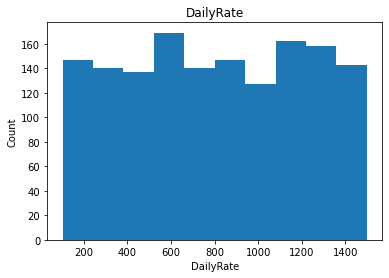

In [430]:
df['DailyRate'].plot(kind='hist')
#df.groupby(['DailyRate']).count().plot(kind = "bar",fontsize=15,figsize=(25,6))
#df['DailyRate'].value_counts().plot(kind = "hist",fontsize=15,figsize=(29,6))
plt.xlabel('DailyRate')
plt.ylabel("Count")
plt.title('DailyRate')
plt.show()

*Observation:* <br>*Daily Rate is in the range of 100 to 1500.*<br>

###### 3 DistanceFromHome Variable

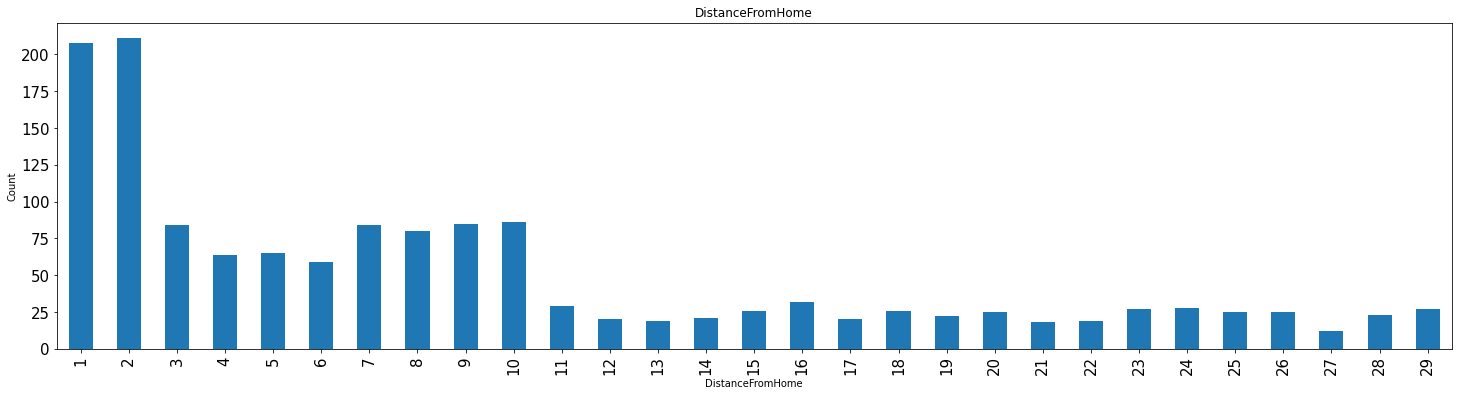

In [431]:
#df['DistanceFromHome'].hist(bins=25)
df.groupby(['DistanceFromHome']).size().plot(kind = "bar",fontsize=15,figsize=(25,6))
plt.xlabel('DistanceFromHome')
plt.ylabel("Count")
plt.title('DistanceFromHome')
plt.show()

*Observation :* <br> *Most of the Employees Distance from Home to Office is in the Range of 1 to 2* <br>
*Some have distance in the range of 3 to 10 and other Employee have distance in the range of 11 to 29*

###### 4 EmployeeNumber Variable

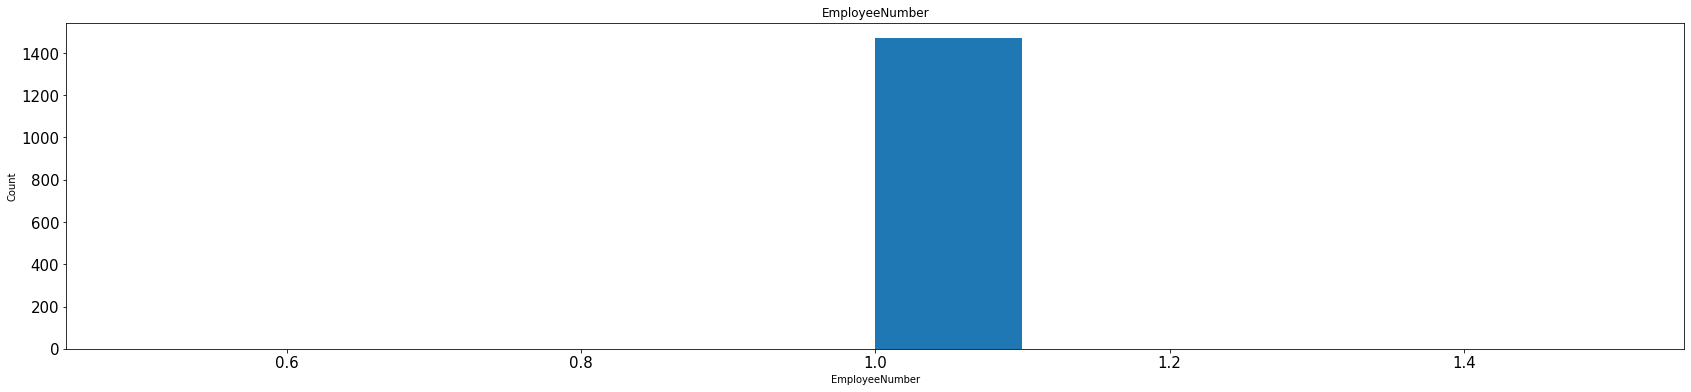

In [432]:
df['EmployeeNumber'].value_counts().plot(kind = "hist",fontsize=15,figsize=(29,6))
plt.xlabel('EmployeeNumber')
plt.ylabel("Count")
plt.title('EmployeeNumber')
plt.show()

*Observation :*<br> *there unique EmployeeNumber from 1 to 1470*

###### 5 HourlyRate Variable

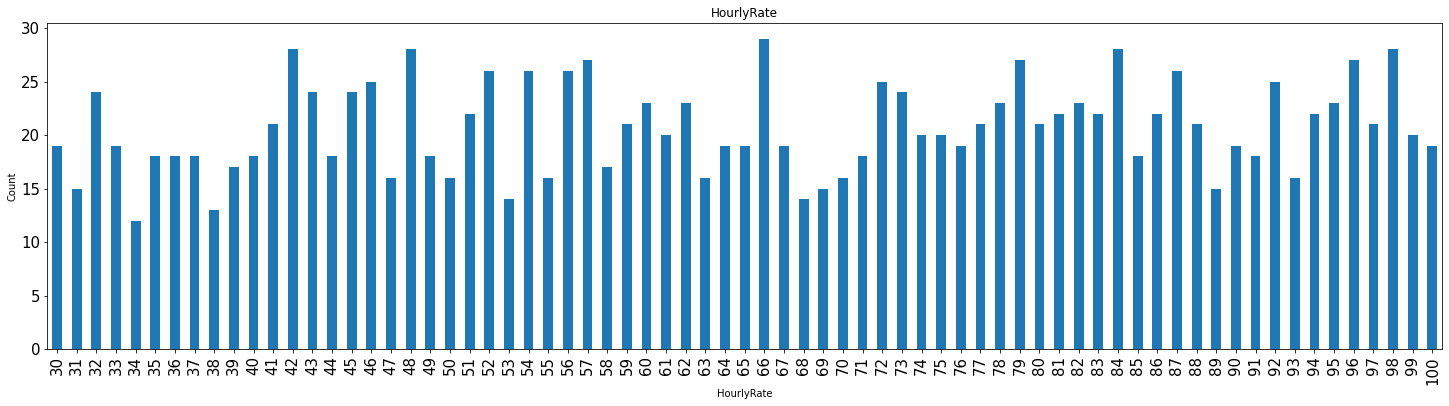

In [433]:
plt.figure(figsize=(23,4))
#df['HourlyRate'].hist(bins=25)
df.groupby(['HourlyRate']).size().plot(kind = "bar",fontsize=15,figsize=(25,6))
plt.xlabel('HourlyRate')
plt.ylabel("Count")
plt.title('HourlyRate')
plt.show()

*Observation :*<br>*Hourly rate is in the range of 30 to 100*


###### 6 MonthlyIncome Variable

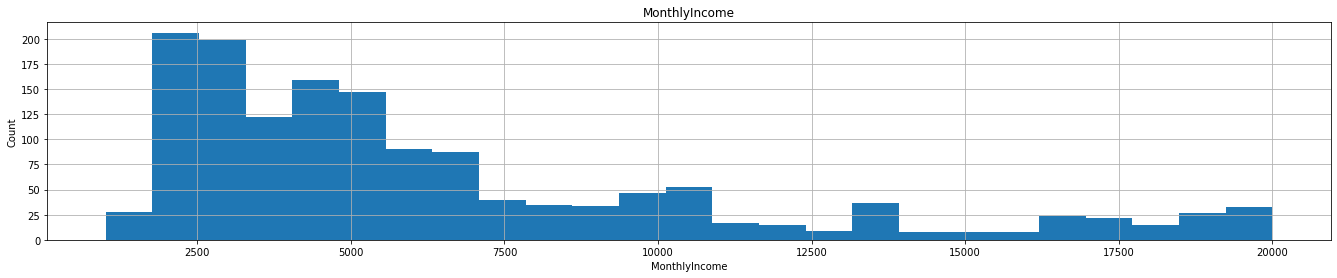

In [434]:
plt.figure(figsize=(23,4))
df['MonthlyIncome'].hist(bins=25)
plt.xlabel('MonthlyIncome')
plt.ylabel("Count")
plt.title('MonthlyIncome')
plt.show()

*Observation :*<br>*Montly Income is in the range of 1000 to 20000*<br>
*Most of the Employee monthly income is in the range of 2000 to 7000*

###### 7 MonthlyRate Variable

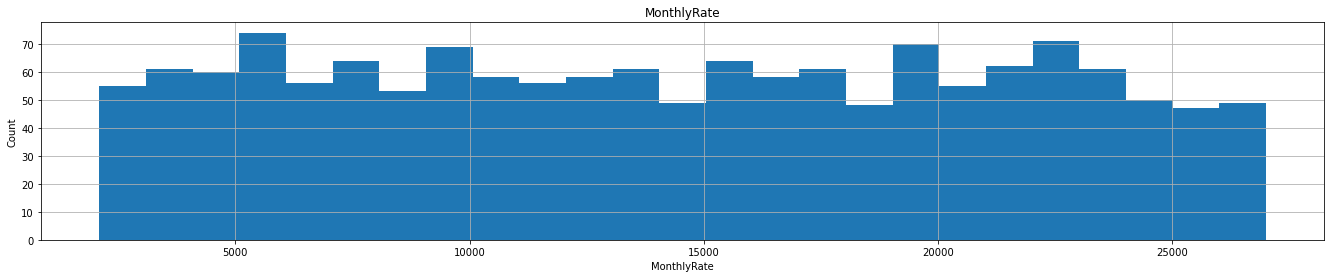

In [180]:
plt.figure(figsize=(23,4))
df['MonthlyRate'].hist(bins=25)
plt.xlabel('MonthlyRate')
plt.ylabel("Count")
plt.title('MonthlyRate')
plt.show()

*Observation :*<br>*Monthly rate is in the range of 2000 to 30000*

###### 8 TotalWorkingYears Variable

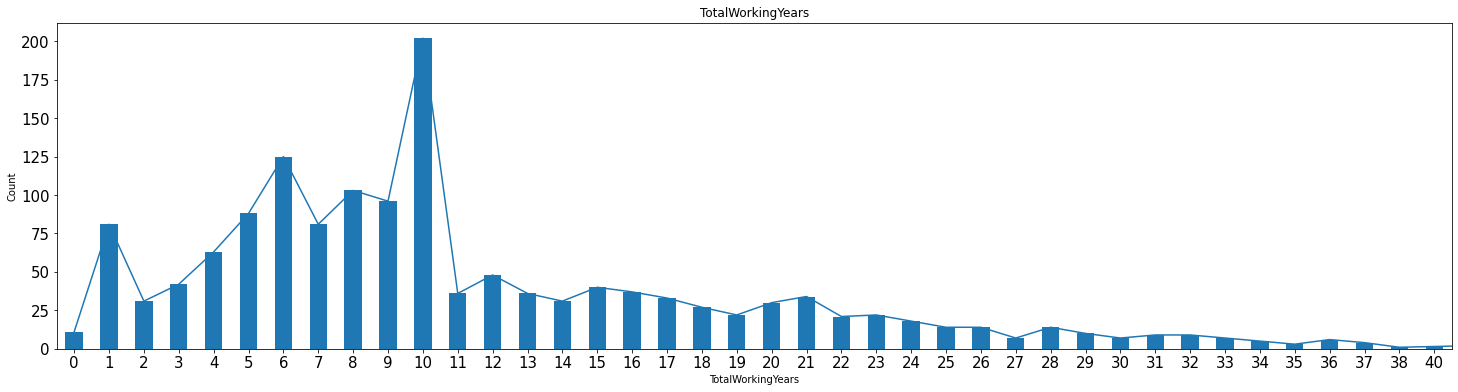

In [181]:
df.groupby(['TotalWorkingYears']).size().plot(kind = "bar",fontsize=15,figsize=(25,6))
df.groupby(['TotalWorkingYears']).size().plot(kind = "line",fontsize=15,figsize=(25,6))
plt.xlabel('TotalWorkingYears')
plt.ylabel("Count")
plt.title('TotalWorkingYears')
plt.show()

*Observation :*<br>* Employee Total Working Years Range between 0 to 40 years*<br>
*Most of the employee total working years are between 1 year, 4 to 9 year,and 10 years is the highest*
*As the total years Increases Employee count decreases.*

###### 9 YearsAtCompany Variable

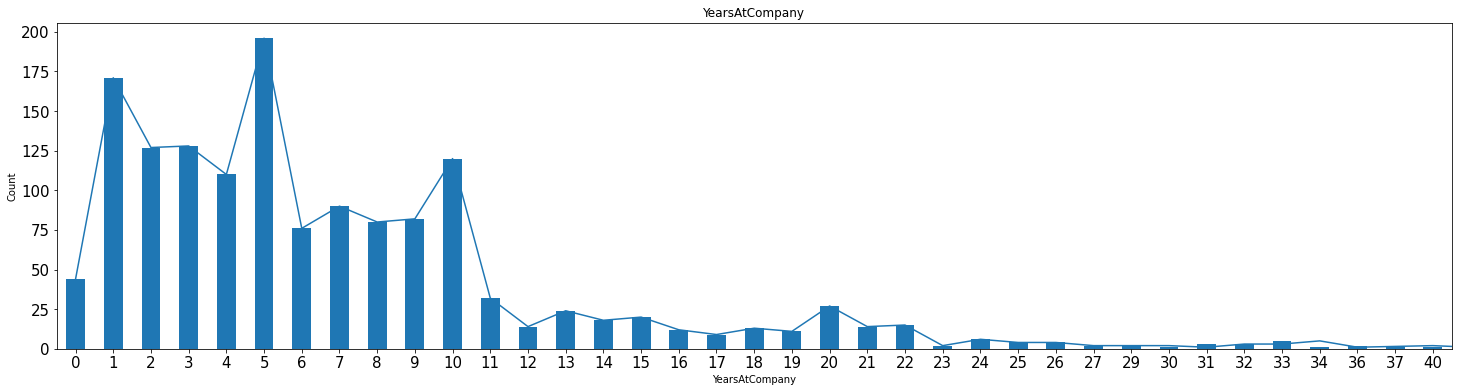

In [182]:
df.groupby(['YearsAtCompany']).size().plot(kind = "bar",fontsize=15,figsize=(25,6))
df.groupby(['YearsAtCompany']).size().plot(kind = "line",fontsize=15,figsize=(25,6))
#df['YearsAtCompany'].value_counts().plot(kind = "bar",fontsize=15,figsize=(29,6))
plt.xlabel('YearsAtCompany')
plt.ylabel("Count")
plt.title('YearsAtCompany')
plt.show()

*Observation :*<br>*Employee Years at Company ranges between o to 40 years*<br>
*From 0 to 10 years Employee count is high,it is highest at 1 year and 5 year.*<br>
*and Employee count it decreases after 11 years.it is least from 27 to 40 year*

###### Multivariate Analysis

###### check for correlation between Variables

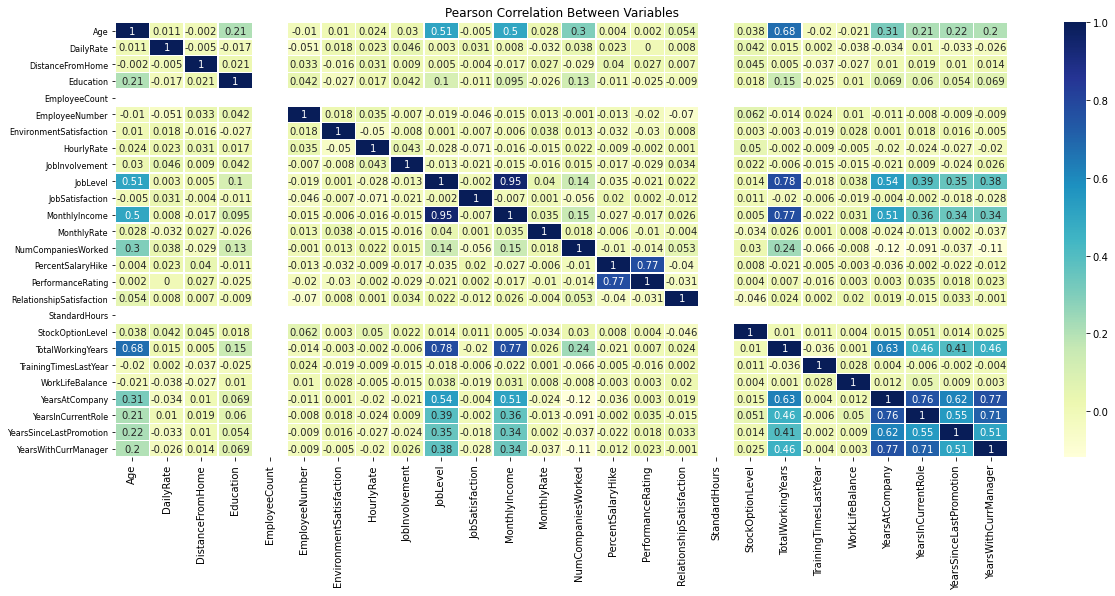

In [321]:
# Numerical Variable Correlation
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(20,8)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()

###### check for Outiliers

In [276]:
#discrete variable

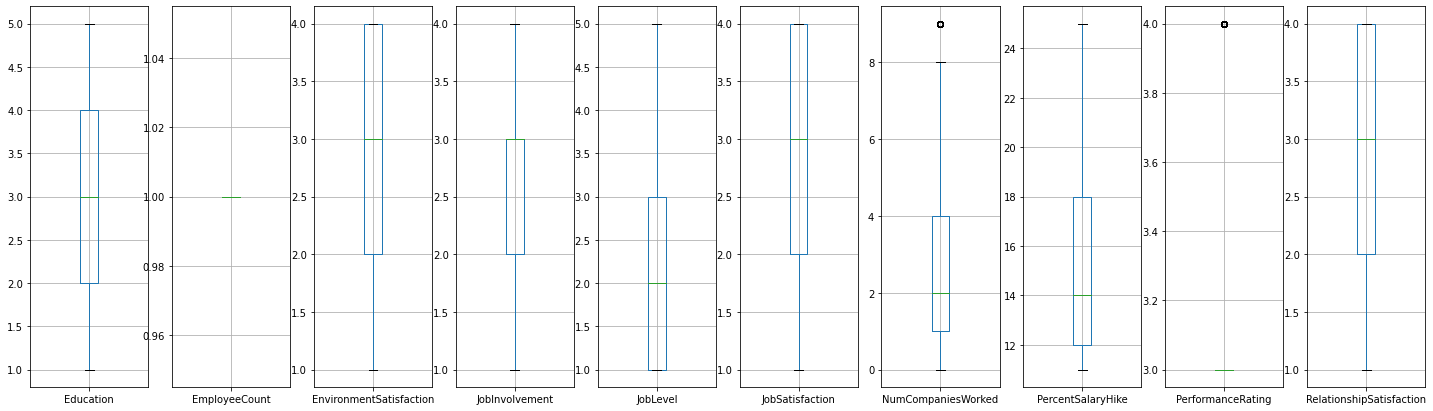

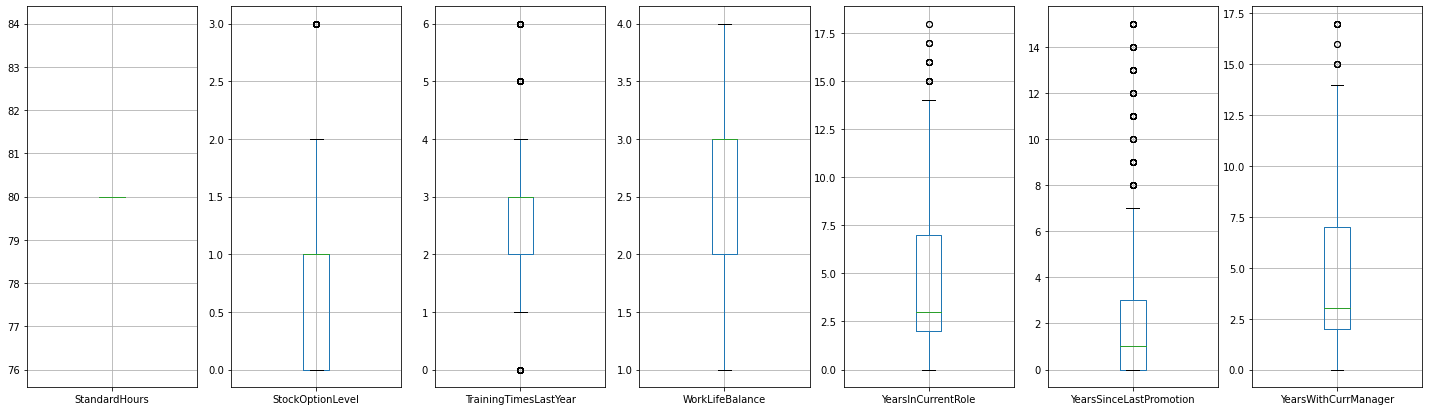

In [435]:
col1=['Education','EmployeeCount','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction']
col2=['StandardHours','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
fig, pltcan=plt.subplots(nrows=1, ncols=len(col1), figsize=(25,7))
for predcol , i in zip(col1, range(len(col1))):
     df[col1].boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])
fig, pltcan=plt.subplots(nrows=1, ncols=len(col2), figsize=(25,7))
for predcol , i in zip(col2, range(len(col2))):
     df[col2].boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])
                        

*Observation :*<br>*Column NUmCompaniesWorked,PerformanceRating, StockOptionLevel, TrainingTimeLastYear, YearsinCurrentRole,
<br>YearsSinceLAtPromotion,YearsWithCurrManager have outliers.*

In [436]:
#continuous variable

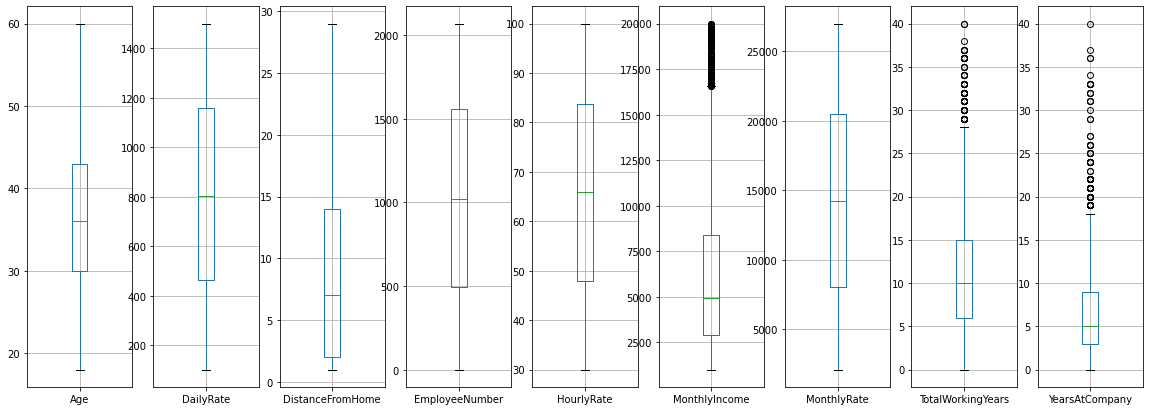

In [437]:
fig, pltcan=plt.subplots(nrows=1, ncols=len(continuous_feature), figsize=(20,7))
for predcol , i in zip(continuous_feature, range(len(continuous_feature))):
     df[continuous_feature].boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])
                        

*Observation*<br>*Column MontlyIncome, TotalWorkingYears, YearsAtCompany have outliers*

###### check for Skewness

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64


<AxesSubplot:>

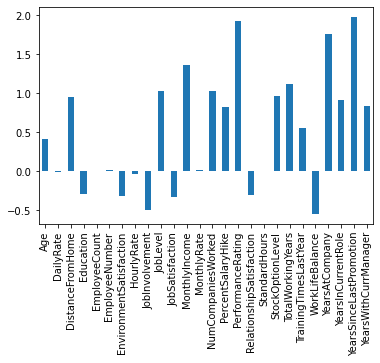

In [438]:
print(df.skew())
df.skew().plot(kind='bar')

*Observation :*<br>* columns DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,*<br>
*PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimeLastYear,WorkingLifeBalance,YearsAtCompany,*<br>
*YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager have skewness.*

###### Converting Categorical variable into Number by labelencoding

In [439]:
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['OverTime']=le.fit_transform(df['OverTime'])
df['Over18']=le.fit_transform(df['Over18'])

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [441]:
#Handling Outliers

In [442]:
fout=['MonthlyIncome','TotalWorkingYears','YearsAtCompany','NumCompaniesWorked','PerformanceRating',
'StockOptionLevel','TrainingTimesLastYear','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit

In [443]:
#Recheck for Outlier After Removing in dataset

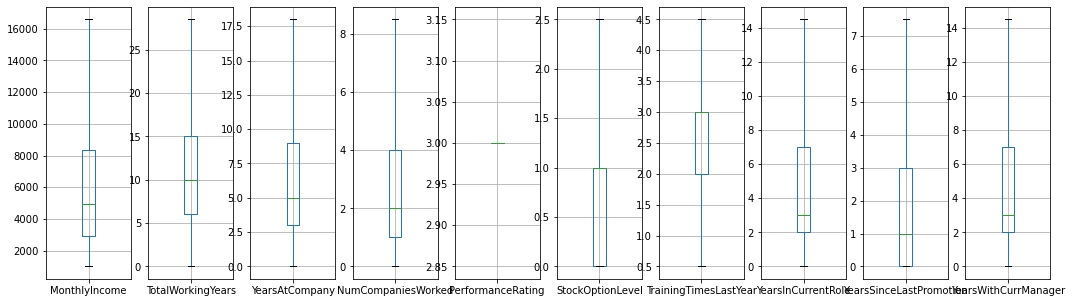

In [444]:
colslst1=['MonthlyIncome','TotalWorkingYears','YearsAtCompany','NumCompaniesWorked','PerformanceRating',
'StockOptionLevel','TrainingTimesLastYear','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

In [445]:
#Handling  Cardinality

In [446]:
#df.drop('EmployeeCount',inplace=True,axis=1)
#df.drop('StandardHours',inplace=True,axis=1)


##### Removing Skewness

In [447]:
#df[['Attrition']]= np.cbrt(df[['Attrition']])
df[['BusinessTravel']]= np.cbrt(df[['BusinessTravel']])
df[['JobLevel']]= np.cbrt(df[['JobLevel']])
df[['MonthlyIncome']]= np.cbrt(df[['MonthlyIncome']])
df[['YearsSinceLastPromotion']]= np.cbrt(df[['YearsSinceLastPromotion']])

df[['DistanceFromHome']]= np.cbrt(df[['DistanceFromHome']])
df[['NumCompaniesWorked']]= np.cbrt(df[['NumCompaniesWorked']])
df[['OverTime']]= np.cbrt(df[['OverTime']])
df[['PercentSalaryHike']]= np.cbrt(df[['PercentSalaryHike']])
df[['TotalWorkingYears']]= np.cbrt(df[['TotalWorkingYears']])
df[['YearsAtCompany']]= np.cbrt(df[['YearsAtCompany']])
df[['YearsInCurrentRole']]= np.cbrt(df[['YearsInCurrentRole']])
df[['YearsWithCurrManager']]= np.cbrt(df[['YearsWithCurrManager']])

df[['EducationField']]= np.cbrt(df[['EducationField']])
df[['StockOptionLevel']]= np.cbrt(df[['StockOptionLevel']])
df[['WorkLifeBalance']]= np.cbrt(df[['WorkLifeBalance']])



Age                         0.413286
Attrition                   1.844366
BusinessTravel             -2.319100
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.186998
Education                  -0.289681
EducationField             -1.015093
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.460775
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.565671
MonthlyRate                 0.018578
NumCompaniesWorked         -0.716593
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.601248
PerformanceRating           0.000000
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

<AxesSubplot:>

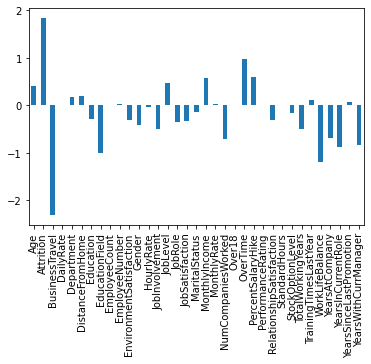

In [448]:
#Recheck Skewness
print(df.skew())
df.skew().plot(kind='bar')


###### Feature Selection

In [450]:
# Anova Test 
sp=[]
for i in df.columns:
    cg=df.groupby('Attrition')[i].apply(list)
    av=stats.f_oneway(*cg)
    if av[1]<0.5:
        print(i,'------correlated------:',av[1],'\n')
        sp.append(i)
    else:
        print(i,'------not correlated-----:',av[1],'\n')


Age ------correlated------: 8.356308021102401e-10 

Attrition ------correlated------: 0.0 

BusinessTravel ------correlated------: 0.09088552610379491 

DailyRate ------correlated------: 0.02985816066026101 

Department ------correlated------: 0.014133018076803096 

DistanceFromHome ------correlated------: 0.0024090493663078394 

Education ------correlated------: 0.2293152033222874 

EducationField ------not correlated-----: 0.8383506551173708 

EmployeeCount ------not correlated-----: nan 

EmployeeNumber ------not correlated-----: 0.685327589729904 

EnvironmentSatisfaction ------correlated------: 7.172338549367721e-05 

Gender ------correlated------: 0.2590923641414023 

HourlyRate ------not correlated-----: 0.7931347689944519 

JobInvolvement ------correlated------: 5.677065356744583e-07 

JobLevel ------correlated------: 6.371829885852653e-13 

JobRole ------correlated------: 0.010014034975791295 

JobSatisfaction ------correlated------: 7.043066741730351e-05 

MaritalStatus -----

In [451]:
df.drop(['EducationField','EmployeeCount','EmployeeNumber','HourlyRate','PerformanceRating','MonthlyRate','Over18','StandardHours'],inplace=True,axis=1)

df.drop(['WorkLifeBalance','TrainingTimesLastYear','RelationshipSatisfaction','NumCompaniesWorked','YearsSinceLastPromotion','Department'],inplace=True,axis=1)

In [452]:
#Correlation with the output variable
cor = df.corr()
ctarget = abs(cor['Attrition'])
rfeatature = ctarget[ctarget>.2]
result1=rfeatature.keys().to_list()
print('strong correlated :',result1)

rfeatature = ctarget[ctarget<0.2]
result2=rfeatature.keys().to_list()
print('\nweak correlated :',result2)

strong correlated : ['Attrition', 'OverTime', 'TotalWorkingYears', 'YearsWithCurrManager']

weak correlated : ['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole']


In [453]:
df.shape

(1470, 21)

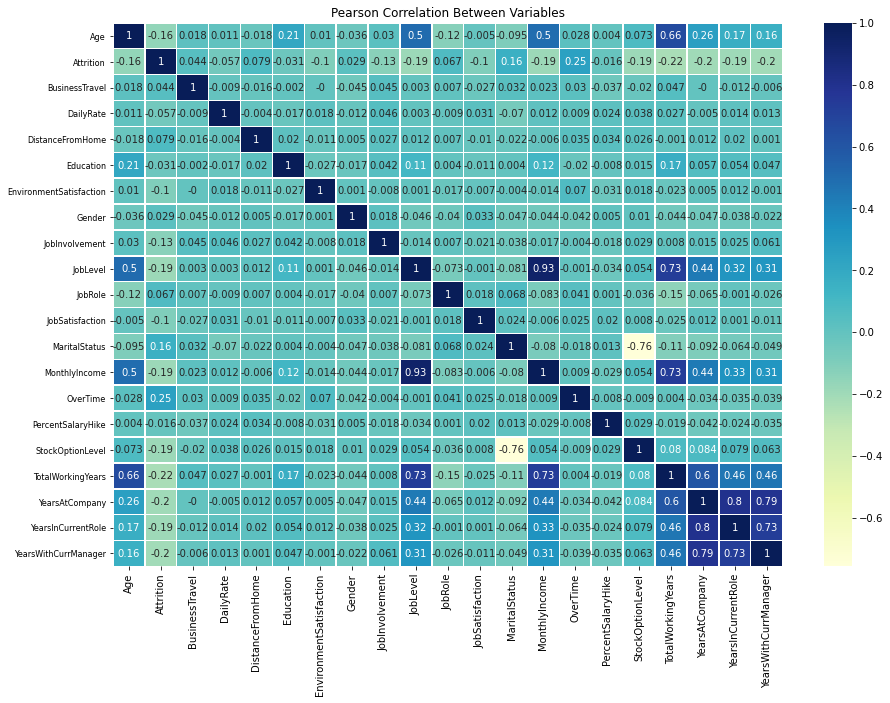

In [456]:
 # Variable Correlation
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(15,10)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()        

In [478]:
df.shape

(1470, 21)

In [479]:
y=df[['Attrition']]
x=df.drop(['Attrition'],axis=1)


###### Normalization

In [510]:

x=power_transform(x,method='yeo-johnson')
x

array([[ 5.22139764e-01,  6.10400978e-01,  7.59289299e-01, ...,
         8.31778380e-02,  2.11923992e-01,  4.70788951e-01],
       [ 1.27641097e+00, -1.08158527e+00, -1.33459724e+00, ...,
         7.77271635e-01,  8.34914652e-01,  8.58523941e-01],
       [ 1.02091477e-01,  6.10400978e-01,  1.34036452e+00, ...,
        -2.45316535e+00, -1.73015812e+00, -1.68662073e+00],
       ...,
       [-1.12375507e+00,  6.10400978e-01, -1.75171312e+00, ...,
         8.31778380e-02, -3.36851614e-01,  2.02833231e-03],
       [ 1.27641097e+00, -1.08158527e+00,  5.83235452e-01, ...,
         6.18515273e-01,  6.43503764e-01,  1.03342274e+00],
       [-2.36188316e-01,  6.10400978e-01, -3.58844642e-01, ...,
        -3.50803533e-01, -4.09302525e-02, -2.89388061e-01]])

###### dividing the dataset in training and testing set

In [481]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 440)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1102, 20)
(1102, 1)
(368, 20)
(368, 1)


###### Sandardization of data

In [482]:

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[-0.12743473  0.47080378 -0.21563074 ... -0.50371362 -0.13837252
  -0.08608937]
 [ 1.17488128  0.47080378 -1.28245962 ... -0.82620968 -0.13837252
  -0.08608937]
 [-1.75532975  0.47080378  1.3379081  ... -0.50371362 -0.13837252
  -0.08608937]
 ...
 [ 0.74077594  0.47080378  1.64271635 ... -0.03016894 -0.13837252
   0.16613226]
 [ 0.08961794 -0.21479589  0.21945846 ...  0.15934462  0.12050995
  -0.08608937]
 [-0.45301374 -0.21479589  1.23958285 ...  0.62446442  0.78881582
   0.93768859]]
[[ 2.12974824 -2.88428926 -1.62160891 ...  1.72362005  1.04929712
  -2.04990608]
 [-0.69843938  0.46433354 -0.62077005 ...  0.82870718  1.04929712
  -0.17231877]
 [ 0.43283567  0.46433354  0.90977486 ...  0.36522554  0.80109329
   0.80082438]
 ...
 [-1.03782189  0.46433354 -0.21839718 ...  0.68601666  0.93038119
   0.93057799]
 [ 0.65909068  0.46433354  0.26037561 ... -0.53808344 -0.16855709
  -0.17231877]
 [-1.2640769   0.46433354  0.17378904 ... -0.53808344 -0.16855709
  -0.17231877]]


###### Model Building

In [484]:
#Logistic Regression

In [485]:
clf = LogisticRegression()
LR=clf.fit(x_train,y_train)
pred=LR.predict(x_test)
print("Training accuracy :", clf.score(x_train, y_train))
print("Testing accuracy :", clf.score(x_test, y_test))

LRtrain=clf.score(x_train, y_train)
LRtest=clf.score(x_test, y_test)
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy on testing data:', round(f1sc,2))

acval=cross_val_score(LR, x , y, cv=10, scoring='f1_weighted')
print('\n10-fold Cross Validation:')
print('Accuracy value :\n',acval)

LRcross=round(acval.mean(),2)
print('\nFinal Average Accuracy :',round(acval.mean(),2))

Training accuracy : 0.867513611615245
Testing accuracy : 0.8668478260869565
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       306
           1       0.70      0.37      0.48        62

    accuracy                           0.87       368
   macro avg       0.79      0.67      0.70       368
weighted avg       0.85      0.87      0.85       368

[[296  10]
 [ 39  23]]
Accuracy on testing data: 0.85

10-fold Cross Validation:
Accuracy value :
 [0.88497471 0.8563819  0.82878041 0.84499072 0.83896459 0.81247379
 0.80090357 0.84316361 0.84316361 0.84850854]

Final Average Accuracy : 0.84


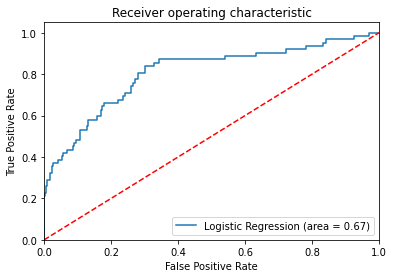

In [486]:
rocauc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [487]:
#SVC

In [488]:
clf = svm.SVC(probability=True)
SVM=clf.fit(x_train,y_train)
pred=SVM.predict(x_test)
print("Training accuracy :", SVM.score(x_train, y_train))
print("Testing accuracy :", SVM.score(x_test, y_test))
SVMtrain=SVM.score(x_train, y_train)
SVMtest=SVM.score(x_test, y_test)

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy on testing data:', round(f1sc,2))

acval=cross_val_score(SVM, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation:')
print('Accuracy value:',acval)
SVMcross=round(acval.mean(),2)

print('\nFinal Average Accuracy:', round(acval.mean(),2))

Training accuracy : 0.895644283121597
Testing accuracy : 0.8668478260869565
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       306
           1       0.88      0.24      0.38        62

    accuracy                           0.87       368
   macro avg       0.87      0.62      0.65       368
weighted avg       0.87      0.87      0.83       368

[[304   2]
 [ 47  15]]
Accuracy on testing data: 0.83

Cross Validation:
Accuracy value: [0.76235828 0.76235828 0.76235828 0.76235828 0.76235828 0.76235828
 0.76235828 0.77194568 0.77194568 0.77194568]

Final Average Accuracy: 0.77


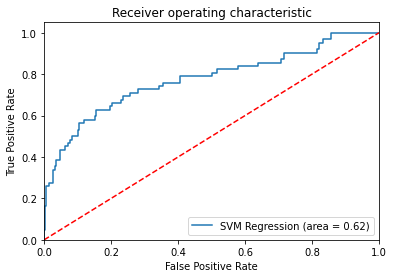

In [489]:
rocauc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM Regression (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

In [490]:
#Decision Tree

In [491]:
clf = tree.DecisionTreeClassifier(max_depth=6,criterion='entropy')
DTree=clf.fit(x_train,y_train)
pred=DTree.predict(x_test)
print("Training accuracy :", DTree.score(x_train, y_train))
print("Testing accuracy :", DTree.score(x_test, y_test))

DTtrain=DTree.score(x_train, y_train)
DTtest=DTree.score(x_test, y_test)
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(f1sc,2))

#fimp = pd.Series(DTree.feature_importances_, index=pred)
#fimp.nlargest(10).plot(kind='barh')
DTcross=round(acval.mean(),2)
acval=cross_val_score(DTree, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation:')
print('Accuracy values:\n',acval)
print('\nFinal Average Accuracy :', round(acval.mean(),2))

Training accuracy : 0.8974591651542649
Testing accuracy : 0.8505434782608695
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       306
           1       0.63      0.27      0.38        62

    accuracy                           0.85       368
   macro avg       0.75      0.62      0.65       368
weighted avg       0.83      0.85      0.83       368

[[296  10]
 [ 45  17]]
Accuracy of the model on Testing Sample Data: 0.83

Cross Validation:
Accuracy values:
 [0.77761777 0.8025165  0.80829118 0.78860936 0.837731   0.81332068
 0.80102173 0.80727488 0.8026963  0.84226973]

Final Average Accuracy : 0.81


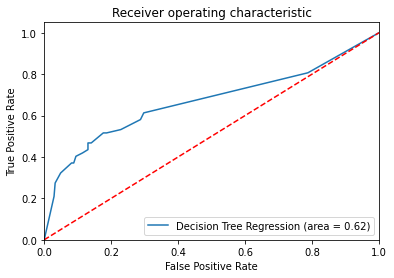

In [492]:
rocauc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Regression (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [493]:
#RAndom Forest

In [494]:
clf = RandomForestClassifier()
RF=clf.fit(x_train,y_train)
pred=RF.predict(x_test)
print("Training accuracy :", RF.score(x_train, y_train))
print("Testing accuracy :", RF.score(x_test, y_test))

RFtrain=RF.score(x_train, y_train)
RFtest=RF.score(x_test, y_test)
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy on testing data:', round(f1sc,2))

Accuracy_Values=cross_val_score(RF, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation')
print('Accuracy values:',Accuracy_Values)
RFcross=round(Accuracy_Values.mean(),2)
print('\nFinal Average Accuracy:', round(Accuracy_Values.mean(),2))


Training accuracy : 1.0
Testing accuracy : 0.8532608695652174
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       306
           1       0.75      0.19      0.31        62

    accuracy                           0.85       368
   macro avg       0.80      0.59      0.61       368
weighted avg       0.84      0.85      0.82       368

[[302   4]
 [ 50  12]]
Accuracy on testing data: 0.82

Cross Validation
Accuracy values: [0.82878041 0.78884388 0.78879691 0.81749494 0.85563764 0.81247379
 0.81054422 0.84316361 0.84233543 0.84850854]

Final Average Accuracy: 0.82


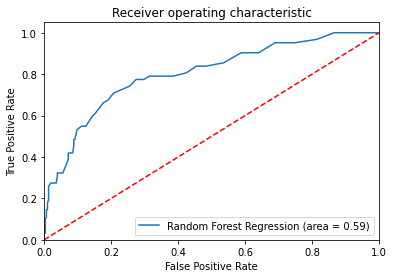

In [495]:

rocauc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Regression (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [496]:
#naive bays

In [497]:
clf = GaussianNB()
NB=clf.fit(x_train,y_train)
pred=NB.predict(x_test)
print("Training accuracy :", NB.score(x_train, y_train))
print("Testing accuracy :", NB.score(x_test, y_test))
NBtrain=NB.score(x_train, y_train)
NBtest=NB.score(x_test, y_test)

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(f1sc,2))

acval=cross_val_score(NB,x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation:')
print('Accuracy values:',acval)
NBcross=round(acval.mean(),2)

print('\nFinal Average Accuracy:', round(acval.mean(),2))

Training accuracy : 0.8112522686025408
Testing accuracy : 0.8043478260869565
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       306
           1       0.43      0.53      0.48        62

    accuracy                           0.80       368
   macro avg       0.67      0.70      0.68       368
weighted avg       0.82      0.80      0.81       368

[[263  43]
 [ 29  33]]
Accuracy of the model on Testing Sample Data: 0.81

Cross Validation:
Accuracy values: [0.79849991 0.85026009 0.83074452 0.79401637 0.82532506 0.78377061
 0.78072711 0.80240883 0.83139694 0.82045855]

Final Average Accuracy: 0.81


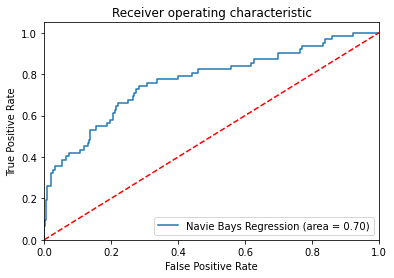

In [498]:
rocauc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Navie Bays Regression (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()


###### Comparison of Model Scores

In [499]:
trainscore=[LRtrain,SVMtrain,DTtrain,RFtrain,NBtrain]
testscore=[LRtest,SVMtest,DTtest,RFtest,NBtest]
VAlscore=[LRcross,SVMcross,DTcross,RFcross,NBcross]
col={'Train Score':trainscore,'Test Score':testscore,'Validation':VAlscore}
models=['Logistic Regression','SVC','Decision Tree','Random Forest','NAvie Bays']
dfp=pd.DataFrame(data=col,index=models)
dfp

,Train Score,Test Score,Validation
Logistic Regression,0.867514,0.866848,0.84
SVC,0.895644,0.866848,0.77
Decision Tree,0.897459,0.850543,0.77
Random Forest,1.000000,0.853261,0.82
NAvie Bays,0.811252,0.804348,0.81


<AxesSubplot:>

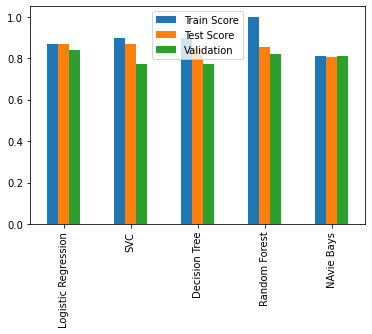

In [500]:
dfp.plot(kind='bar')

###### Hyperparameter tuning for NAvie BAyes

In [501]:
#var_smoothing=np.logspace(0,-9, num=100)
#priors=[None]
var_smoothing=[0.00000001, 0.000000001, 0.00000001]
priors=[[1, 0], [1, 1],[0,1]]
param_distributions = dict(priors=priors,
                           var_smoothing=var_smoothing)

random = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Score:  0.5
Best Params:  {'var_smoothing': 1e-08, 'priors': [1, 0]}


In [ ]:
#NAvie Biyes as Final model 

###### Retraining MOdel

In [503]:
y=df[['Attrition']]
x=df.drop(['Attrition'],axis=1)

PScaler=StandardScaler()
PScalerFit=PScaler.fit(x)

X=PScalerFit.transform(x)

print(X.shape)
print(y.shape)

(1470, 20)
(1470, 1)


In [504]:
clf =GaussianNB(var_smoothing=1e-08,priors=[1, 0])

finalLM=clf.fit(X,y)

print("Accuracy :", finalLM.score(X, y))

paccval=cross_val_score(finalLM, X , y, cv=5, scoring='f1_weighted')
print('\nCross Validation')
print('Accuracy values:',acval)
print('\nFinal Average Accuracy of the model:', round(acval.mean(),2))

Accuracy : 0.8387755102040816

Cross Validation
Accuracy values: [0.79849991 0.85026009 0.83074452 0.79401637 0.82532506 0.78377061
 0.78072711 0.80240883 0.83139694 0.82045855]

Final Average Accuracy of the model: 0.81


###### Model Saving

In [509]:
import pickle
filename='HRAttrition.pk1'
pickle.dump(NB,open(filename,'wb'))
print("Model Saved")

Model Saved
